# Computational Mathematics <a class="tocSkip">

## 2022/23 Assessment <a class="tocSkip">

## Release: 12PM (MIDDAY) Thursday 3 November 2022 <a class="tocSkip">

## Deadline: 4PM Friday 4th November 2022 <a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module "Computational Mathematics" for year 2022/23.


- **This is independent work, you cannot work in groups.**


- This notebook contains three questions. Please answer all questions.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use any library we used in lectures, and **you may reuse any code from lectures and homeworks**. If you use an algorithm not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - **please submit a version where you have run all of the cells and all the outputs/plots etc are visible without the marker having to run the notebook themselves**.
    
    

- If you are happy to write down your mathematical work in the form of Latex directly within this notebook then feel free to do this.


- Alternatively you may if you choose submit parts of your answers via **scans or photos of hand written pages** - feel free to use this option in particular for supplementary sketches, equations or where I have asked you to complete a task with "pen and paper". You will not be marked down for not embedding equations into your markdown cells. Please make sure that the question number each sheet you scan refers to is very clear. Even if you embed the images within the notebook, please also commit the images files to your github submission.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from math import factorial
from cProfile import label

import scipy.interpolate as si
import scipy.integrate as sig
from mpltools import annotation


# Question 1

Consider the following two statements

<br>

1. All models are wrong, but some are useful.


2. A model may get the right answer for the wrong reason.

<br>

Where here we interpret a "model" as a piece of code written to provide a synthetic representation of some real world phenomena.

<br>

- Explain what each of these two statements means and why they are important. 



- What can we as "model" developers do to mitigate the issues that may be implied by these two statements.

<br>

The best answers (i.e. those that achieve the highest marks) will be clear, concise, show a depth of understanding, and synthesise material from across the module. You should provide examples to aid your explanations where appropriate, and you should not simply reuse text or examples directly from the lectures.

# Answer for Question 1
<br>
1. All models are wrong, but some are useful.
<br>

The statement shows that no model can be used for any condition. For example, Clapeyron equation for the gas pressure calculation: 
<br>
$$PV=nRT$$
The construction of the model is only useful when the molecular spacing is infinite relative to the molecules, the forces between the molecules are negligible and the molecular volume is negligible, otherwise the model is wrong. 
<br>
<br>

In addition, all models cannot be represented in the most accurate numerical form in practical, as the composition in the real world cannot be measured and represented by a finite number of digits. For example, Taylor series, natural logarithm $e$ can be represented as:
<br>
$$ e= 1 + \frac{1}{1!} + \frac{1}{2!} + \frac{1}{3!} + \frac{1}{4!} + ....$$
Taking the first 10 terms as the model to calculate $e$, the result is close to the irrational value but can't be equal to that.

In [2]:
e = 1
for i in range(1,10):
    e += 1/factorial(i)
print('e for Taylor series: ', e)
print('Error to real e:', abs(e-np.exp(1)))
print('The result is close to the real e:', np.isclose(e, np.exp(1)))

e for Taylor series:  2.7182815255731922
Error to real e: 3.0288585284310443e-07
The result is close to the real e: True


<br>
2. A model may get the right answer for the wrong reason.
<br>

The statement means wrong model design. Different from the previous statement, the model is not useful because it may apply the results of a specific situation, thereby designing in an incorrect way. In the same system or based on the same principles, the output is wrong when the input is changed due to the wrong understading during model development. For example，it is known that a curve passing through points of $(0,0)$ and $(1,1)$, but after building the model by thinking it as a linear function, it cannot pass through all the points. 


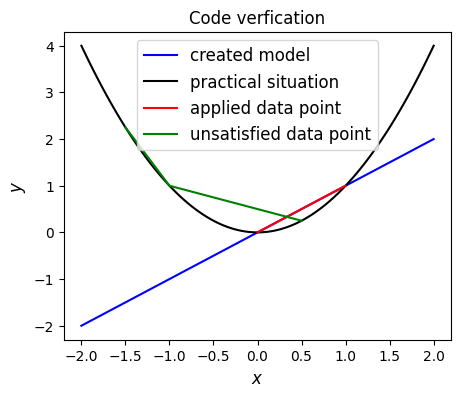

In [8]:
x0 = [0, 1]
y0 = [0, 1]
x1 = [-1.5, -1, 0.5]
y1 = [(-1.5)**2, (-1)**2, 0.5**2]
x = np.linspace(-2, 2, 100)
y = x**2
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.set_title('Code verfication')
ax.plot(x, x, 'b', label='created model')
ax.plot(x, y, 'k', label='practical situation')
ax.plot(x0, y0, 'r', label='applied data point')
ax.plot(x1, y1, 'g', label='unsatisfied data point')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.legend(loc='best', fontsize=12)